In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('quikr_car.csv')

In [4]:
data2 = pd.DataFrame(data)

In [5]:
backup = data

In [6]:
data2.shape

(892, 6)

In [7]:
data2.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [9]:
data2.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [11]:
for column in data2.columns:
    print(data2[column].unique())
    print('*'*150)

['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Hyundai i20 Sportz 1.2' 'Maruti Suzuki Alto 800 Lx'
 'Maruti Suzuki Vitara Brezza ZDi' 'Maruti Suzuki Alto LX'
 'Mahindra Bolero DI' 'Maruti Suzuki Swift Dzire ZDi'
 'Mahindra Scorpio S10 4WD' 'Maruti Suzuki Swift Vdi BSIII'
 'Maruti Suzuki Wagon R VXi BS III' 'Maruti Suzuki Wagon R VXi Minor'
 'Toyota Innova 2.0 G 8 STR BS IV' 'Renault Lodgy 85 PS RXL'
 'Skoda Yeti Ambition 2.0 TDI CR 4x2' 'Maruti Suzuki Baleno Delta 1.2'
 'Renault Duster 110 PS RxZ Diesel Plus' 'Renault Duster 85 PS RxE Diesel'
 'Honda City 1.5 S MT' 'Maruti Suzuki D

In [12]:
for column in data2.columns:
    print(data2[column].value_counts())
    print('*'*150)
    

name
Honda City                         13
Honda Amaze                        11
Maruti Suzuki Dzire                10
Mahindra Scorpio S10                9
Maruti Suzuki Alto 800 Lxi          9
                                   ..
Mahindra Bolero DI BSII             1
Audi Q3 2.0 TDI quattro Premium     1
Skoda Superb 1.8 TFSI AT            1
BMW 5 Series 520d Sedan             1
Chevrolet Sail 1.2 LT ABS           1
Name: count, Length: 525, dtype: int64
******************************************************************************************************************************************************
company
Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Nissan          6
Commercial      6
Mercedes        6
Mitsubishi      6
Force           4
Fiat            4
t

# Anomalies

- Many objects for int
- Too many things in name , slice to 3 words
- Year has objs
- price has , and non int
- company has int
- kms driven has , and kms for int
- nan value in fuel



# For year

In [13]:
data2 = data2[data2['year'].str.isnumeric()]

In [14]:
data2['year'] = data2['year'].astype(int)

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


# For Price

In [16]:
data2 = data2[data2['Price']!= 'Ask For Price']

In [17]:
data2['Price'] = data2['Price'].str.replace(',','').astype(int)

In [18]:
data2['Price'].head()

0     80000
1    425000
3    325000
4    575000
6    175000
Name: Price, dtype: int32

# For kms Driven

In [19]:
data2['kms_driven'] = data2['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [20]:
data2 = data2[data2['kms_driven'].str.isnumeric()]

In [21]:
data2['kms_driven'] = data2['kms_driven'].astype(int)

In [22]:
data2.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


# For fuel type

In [23]:
data2 = data2[~data2['fuel_type'].isna()]

In [24]:
data2['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

# For company

In [25]:
data2['company'].value_counts()

company
Maruti        221
Hyundai       139
Mahindra       98
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: count, dtype: int64

In [26]:
data2 = data2[~data2['company'].str.isnumeric()]

In [27]:
print((data2['company'].value_counts) == 1)

False


In [28]:
data2['company'].value_counts()

company
Maruti        221
Hyundai       139
Mahindra       98
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: count, dtype: int64

# For Name

In [29]:
data2['name'].head(1)

0    Hyundai Santro Xing XO eRLX Euro III
Name: name, dtype: object

In [32]:
data2['name'] = data2['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [41]:
data2 = data2.reset_index(drop = True)

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [44]:
data2.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


# Idetifing the Outlier

<Axes: xlabel='Price', ylabel='Count'>

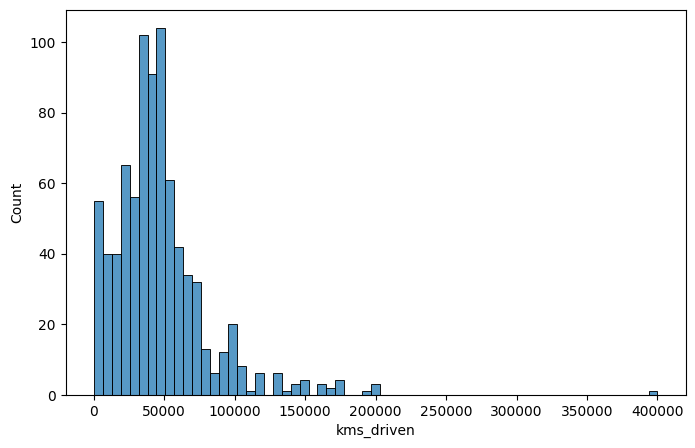

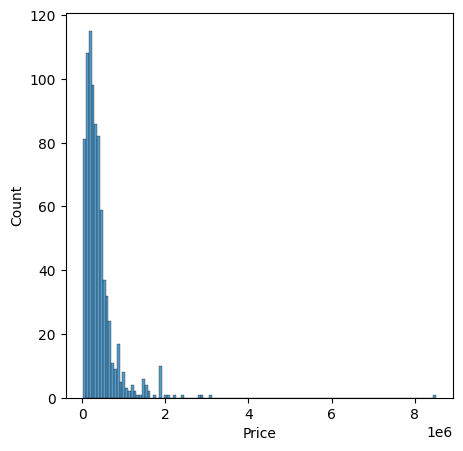

In [49]:
fig, ax = plt.subplots(figsize = (8,5))
sns.histplot(data2.kms_driven)
fig, ax = plt.subplots(figsize = (5,5))
sns.histplot(data2.Price)

## Outliers

In [51]:
data2[data2['Price']>6e6]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [52]:
data2[data2['kms_driven']>350000]

,name,company,year,Price,kms_driven,fuel_type
348,Honda City 1.5,Honda,2010,240000,400000,Petrol


In [53]:
data2 = data2[data2['Price']<6e6].reset_index(drop= True)

In [54]:
data2 = data2[data2['kms_driven']<350000].reset_index(drop= True)

In [55]:
data2.describe()

,year,Price,kms_driven
count,814.000000,8.140000e+02,814.000000
mean,2012.445946,4.019921e+05,45842.547912
std,4.006625,3.817812e+05,32017.452360
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56681.000000
max,2019.000000,3.100000e+06,200000.000000


# Cleaned Data

In [60]:
data2.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [61]:
data2.to_csv('Cleaned Car_data.csv')